In [30]:
import pandas as pd
import numpy as np
import numpy as np
import mglearn
from matplotlib import rc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import xgboost as xgb
from lightgbm import LGBMRegressor

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 나눔 폰트를 사용합니다.
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [19]:
train = pd.read_excel("221021_아버지아들키.xlsx", sheet_name='train')
test = pd.read_excel("221021_아버지아들키.xlsx", sheet_name='test')

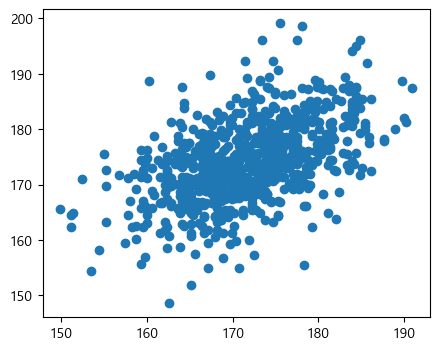

In [20]:
# 1.훈련셋, 테스트셋 나누기
X_train = train['Father'].to_numpy().reshape(-1,1)
# X_train = train['Father'].to_numpy()[:, np.newaxis]
y_train = train['Son'].to_numpy()
X_test = test['Father'].to_numpy().reshape(-1,1)
X_test = test['Father'].to_numpy()[:, np.newaxis]
y_test = test['Son'].to_numpy()

# 2.데이터 분포 보기 - 약한 선형성을 띈다
plt.figure(figsize=(5,4))
plt.scatter(X_train, y_train)

In [21]:
# 3.모델 선언
LR = LinearRegression()
KNN = KNeighborsRegressor(n_neighbors=50)
# KNN = KNeighborsRegressor()
DT = DecisionTreeRegressor()
RF = RandomForestRegressor(n_estimators=500)
GBR = GradientBoostingRegressor(n_estimators=500)

# 4.모델 학습
LR.fit(X_train, y_train)
KNN.fit(X_train, y_train)
DT.fit(X_train, y_train)
RF.fit(X_train, y_train)
GBR.fit(X_train, y_train)

# 5.테스트셋 넣기
predictLR = LR.predict(X_test)
predictKNN = KNN.predict(X_test)
predictDT = DT.predict(X_test)
predictRF = RF.predict(X_test)
predictGBR = GBR.predict(X_test)


# 6.모델 평가
print("===== 모델평가 =====")
print("선형모델 : ", r2_score(y_test, predictLR))
print("KNN모델 : ", r2_score(y_test, predictKNN))
print("DT모델 : ", r2_score(y_test, predictDT))
print("RF모델 : ", r2_score(y_test, predictRF))
print("GBR모델 : ", r2_score(y_test, predictGBR), "\n")


# # train으로 한 번 해봄
# predictLR = LR.predict(X_train)
# predictKNN = KNN.predict(X_train)
# predictDT = DT.predict(X_train)

# print("선형모델 : ", r2_score(y_train, predictLR))
# print("KNN모델 : ", r2_score(y_train, predictKNN))
# print("DT모델 : ", r2_score(y_train, predictDT))


===== 모델평가 =====
선형모델 :  0.2519977905846619
KNN모델 :  0.2434867959852367
DT모델 :  0.07133438875422093
RF모델 :  0.11936181651585598
GBR모델 :  0.09088520188892446 



### Voting

In [22]:
# # 7.의사결정시 방법 : Voting으로 결정

print("======== 예측값 r2_score의 평균 ========")
# # 방법1. 평균
avg_predict1 = (predictLR + predictKNN + predictDT) / 3
print("그냥 평균 성능 : ", r2_score(y_test, avg_predict1))

# # 방법2. 가중평균 - 비율로 가중치 부여
avg_predict2 = (predictLR*24 + predictKNN*25 + predictDT*7) / 56
print("가중치 : ", r2_score(y_test, avg_predict2), "\n")

# # Random Forest 추가
# # 방법1. 평균
print("\n", "<Random Forest 추가>")
avg_predict3 = (predictLR + predictKNN + predictDT + predictRF) / 4
print("그냥 평균 성능 : ", r2_score(y_test, avg_predict3))

# # 방법2. 가중평균 - 비율로 가중치 부여
avg_predict4 = (predictLR*24 + predictKNN*25 + predictDT*7 + predictRF*11) / 67
print("가중치 : ", r2_score(y_test, avg_predict4), "\n")

# # 8.분산 확인해보기 
# # (분산은 평균에서 어느 정도 떻어져 있나, 클수록 넓은 분포를 가지고 있다.)
# # 표본이 모집단에 가깝게 크기가 커질수록 평균은 모집단의 평균에 수렴한다.

print("======== 분산 ========")
print("LR : " , np.cov(predictLR))
print("KNN : " , np.cov(predictKNN))
print("DT : " , np.cov(predictDT))
print(np.cov(avg_predict1))
print(np.cov(avg_predict2))

print("\n", "<Random Forest 추가>")
# # Random Forest 추가
print("LR : " , np.cov(predictLR))
print("KNN : " , np.cov(predictKNN))
print("DT : " , np.cov(predictDT))
print("RF : " , np.cov(predictRF))
print(np.cov(avg_predict3))
print(np.cov(avg_predict4))

======== 예측값 r2_score의 평균 ========
그냥 평균 성능 :  0.22896318302324248
가중치 :  0.24710058485557873 


 <Random Forest 추가>
그냥 평균 성능 :  0.2106255820335189
가중치 :  0.2384969459883275 

======== 분산 ========
LR :  13.020016090787738
KNN :  11.681305648013176
DT :  18.70637762177803
12.537009926618786
12.09708088056144

 <Random Forest 추가>
LR :  13.020016090787738
KNN :  11.681305648013176
DT :  18.70637762177803
RF :  16.86594936773861
13.180833722636487
12.281852921696201


In [23]:
# # 8.분산 확인해보기 
# # (분산은 평균에서 어느 정도 떻어져 있나, 클수록 넓은 분포를 가지고 있다.)
# # 표본이 모집단에 가깝게 크기가 커질수록 평균은 모집단의 평균에 수렴한다.

print("LR : " , np.cov(predictLR))
print("KNN : " , np.cov(predictKNN))
print("DT : " , np.cov(predictDT))
print(np.cov(avg_predict1))
print(np.cov(avg_predict2))

print("\n", "<Random Forest 추가>")
# # Random Forest 추가
print("LR : " , np.cov(predictLR))
print("KNN : " , np.cov(predictKNN))
print("DT : " , np.cov(predictDT))
print("RF : " , np.cov(predictRF))
print(np.cov(avg_predict3))
print(np.cov(avg_predict4))

LR :  13.020016090787738
KNN :  11.681305648013176
DT :  18.70637762177803
12.537009926618786
12.09708088056144

 <Random Forest 추가>
LR :  13.020016090787738
KNN :  11.681305648013176
DT :  18.70637762177803
RF :  16.86594936773861
13.180833722636487
12.281852921696201


### Boosting

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

# # 7.의사결정시 방법 : Boosting으로 결정
print("======== 예측값 r2_score의 평균 ========")
# # 방법1. 평균
avg_predict3 = (predictLR + predictKNN + predictDT + predictRF + predictGBR) / 5
print("그냥 평균 성능 : ", r2_score(y_test, avg_predict3))

# # 방법2. 가중평균 - 비율로 가중치 부여
avg_predict4 = (predictLR*24 + predictKNN*25 + predictDT*7 + predictRF*11 + predictGBR*12) / 79
print("가중치 : ", r2_score(y_test, avg_predict4), "\n")

# # 8.분산 확인해보기 
print("======== 분산 ========")
print("LR : " , np.cov(predictLR))
print("KNN : " , np.cov(predictKNN))
print("DT : " , np.cov(predictDT))
print("RF : " , np.cov(predictRF))
print("GBR : " , np.cov(predictGBR)) #Boosting
print("평균 : " , np.cov(avg_predict3))
print("가중치 : ", np.cov(avg_predict4))

======== 예측값 r2_score의 평균 ========
그냥 평균 성능 :  0.19313821753990934
가중치 :  0.22681194361656187 

======== 분산 ========
LR :  13.020016090787738
KNN :  11.681305648013176
DT :  18.70637762177803
RF :  16.86594936773861
GBR :  17.79056830323543
평균 :  13.79038322763009
가중치 :  12.599511517444048


### XGBoost 추가해서 비교

In [38]:
# 3.모델 선언
LR = LinearRegression()
KNN = KNeighborsRegressor(n_neighbors=50)
# KNN = KNeighborsRegressor()
DT = DecisionTreeRegressor()
RF = RandomForestRegressor(n_estimators=500)
GBR = GradientBoostingRegressor(n_estimators=500)
XGB = xgb.XGBRegressor()
LGB = LGBMRegressor()

# 4.모델 학습
LR.fit(X_train, y_train)
KNN.fit(X_train, y_train)
DT.fit(X_train, y_train)
RF.fit(X_train, y_train)
GBR.fit(X_train, y_train)
XGB.fit(X_train, y_train)
LGB.fit(X_train, y_train)

# 5.테스트셋 넣기
predictLR = LR.predict(X_test)
predictKNN = KNN.predict(X_test)
predictDT = DT.predict(X_test)
predictRF = RF.predict(X_test)
predictGBR = GBR.predict(X_test)
predictXGB = XGB.predict(X_test)
predictLGB = LGB.predict(X_test)


# 6.모델 평가

print("===== 모델평가 =====")

scoreLR = r2_score(y_test, predictLR)
scoreKNN = r2_score(y_test, predictKNN)
scoreDT = r2_score(y_test, predictDT)
scoreRF = r2_score(y_test, predictRF)
scoreGBR = r2_score(y_test, predictGBR)
scoreXGB = r2_score(y_test, predictXGB)
scoreLGB = r2_score(y_test, predictLGB)

print("선형모델 : ", scoreLR)
print("KNN모델 : ", scoreKNN)
print("DT모델 : ", scoreDT)
print("RF모델 : ", scoreRF)
print("GBR모델 : ", scoreGBR)
print("XGB모델 : ", scoreXGB)
print("LGB모델 : ", scoreLGB)


===== 모델평가 =====
선형모델 :  0.2519977905846619
KNN모델 :  0.2434867959852367
DT모델 :  0.07133438875422093
RF모델 :  0.11827543746757507
GBR모델 :  0.09088520188892446
XGB모델 :  0.07841681998519068
LGB모델 :  0.18113480901854329


### XGBoost 추가해서 비교

<BarContainer object of 7 artists>

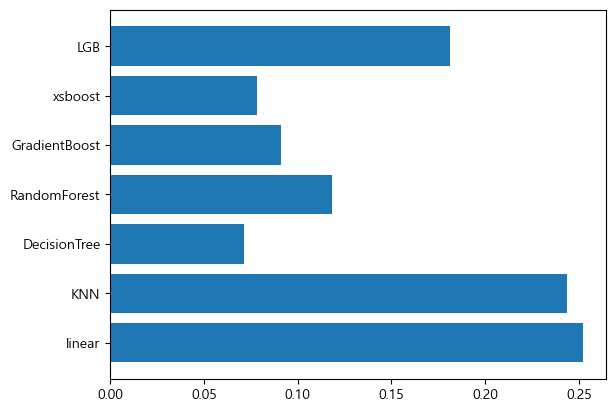

In [44]:
axisY = ['linear', 'KNN', 'DecisionTree', 'RandomForest',
         'GradientBoost', 'xsboost', 'LGB']
axisX = [scoreLR, scoreKNN, scoreDT, scoreRF, scoreGBR, scoreXGB, scoreLGB]
plt.barh(axisY, axisX)